# Diabetes

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/Diabetics.png" width=1000>


Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [234]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/diabetes_1.csv

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [235]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, RocCurveDisplay
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [236]:
warnings.filterwarnings("ignore")

In [237]:
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/diabetes_1.csv"

df = pd.read_csv(path)

In [238]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [239]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Pregnancies[int64],Mean (sd) : 3.8 (3.4)min < med < max:0.0 < 3.0 < 17.0IQR (CV) : 5.0 (1.1),17 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiklEQVR4nO3dTW7aQBiA4W9KAPNTWwgJdlygUhcsfYgettvusuAE3IANQkJghBMHY9xNqSqVBPCEMN/kfdaZMYtXQWPPYFOWpQCu+3LvDwBc4uHcHxhjWiLSqDj/rizL54pjgb/eDNUY0+r3+z/CMOxVmXyz2ayMMT+JFbbO/UdthGHYi+P4OYqi7JqJkyQJJpNJb7lcNkSEUGHl7Fe/iEgURdlgMHiqMH+rwhjgPyymoAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSocNF+1KqKoqiLSGiMqToFR1kgIjcMNU3Tep7n30ejUa1Wq111OuCIoyw4ulmou93uIQiC9ng8zobD4era8Rxlwb9u+tUvItLpdKoeYxHhKAv+YDEFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSrc/BGqDcvdV+y88oizodruvmLnlV+cDdVm9xU7r/zjbKhHFruv2HnlERZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjg/A3/e+FlxW4h1BN4WbF7CPU0XlbsGEJ9Ay8rdgeLKahAqFCBUKECoUIFbxdTluetwsPhUL/TtbkHe4KXodqet8rzPCiK4luWZY8ictWqn7Net+FlqLa/dj2bzXrT6bS93+9rH3lt7sG+zstQj6qet1qtVtb3QTnr9b5YTEEFQoUKhAoVCBUqECpU8HrV/xn5uuGbUD3i84ZvQnWM7aPfbrc7iON449uGb0J1yHs9+m02m4++PWwgVIfc89GviNuvrb8o1CRJgmsn3m63gYhImqbBYrFof+R4rdc+jrVV5drz+fyr7Wvr1+v11hjzS0SqjH8py/LVcb8BIYduc82dKcAAAAAASUVORK5CYII="">",0(0.0%)
2,Glucose[int64],Mean (sd) : 120.9 (32.0)min < med < max:0.0 < 117.0 < 199.0IQR (CV) : 41.2 (3.8),136 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrElEQVR4nO3dMY7aQBSA4TdhITZEtoAEOi4QiYKSPm0OmyOkoEhDww3oEBYywsHBGFJtlI02S/DY2nmT/6vX2MW/rOx94zHX61UA17157QsA/sXDa1+Aj4wxoYh0Kh5+ul6vxzqvxweEWjNjTDgcDj9HUdSvcvx+v98ZY74Q61OEWr9OFEX9+Xx+jOM4v+fANE2DxWLRT5KkIyKE+htCbUgcx/loNPpe4dCw9ovxADdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIF/tfvmLIs2yISGWOqfoSXY4KE6pAsy9pFUUwnk0mr1WrdNXn1yNcxQUJ1yOl0egiCoDubzfLxeLy793ifxwQJ9S8spvSjy+XStjl3r9erOiIo4umYIKE+w2ZKvyiKoCzLj3mefxWRqrHhD4T6vMpT+uv1ur9arbrn87nV1MX9jwj1BVWm9He7nZd/el8bz1GhAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjAPKpnLFexOruClVA9YruK1eUVrITqEZtVrK6vYCVUD1msYnV2GQ03U1CBUKECoUIFQoUKhAoVCBUqECpUIFSowAN//OLy264JFSLi/tuuCRUi4v7brgkVT9i87bosy0gaGjEkVNSi6RFDQkUtmh4xJFTUqqkRQ56jQgVvv1Ettt8RqWELHtTLy1Bttt8RYQseF3kZqlhsvyPCFjwu8jVUEam2/Y4IW/C4iJspqECoUIFQoQKhQoWbN1OWzyOdfZcRdHkxVNvnkbbziRa/JDyw98ytb9ROFEX96XQqYRj+uOeDj8fj2+Vy+SFJkvfGmH2FawsGg8GnOI7f3Xvg4wP77Xb7rcJ55XA4BCIiWZYFm82mq+FYzedO0zS49TM/AdKLX9Vn3NB6AAAAAElFTkSuQmCC"">",0(0.0%)
3,BloodPressure[int64],Mean (sd) : 69.1 (19.4)min < med < max:0.0 < 72.0 < 122.0IQR (CV) : 18.0 (3.6),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3du47aQBSA4TPhInOJLUCCjheIlILSfdo8bB4hBUVq3oAGISFkhHctjHGabJREm13swWLO8H/9LFP88u6wMx5TlqUArvtw7wkA12jfewI+Msb0RKRbc/ipLMvnW87HB4R6Y8aY3mQy+RqG4ajO+MPhsDfGfCPWvxHq7XXDMBzFcfwcRVFWZWCSJMFyuRztdruuiBDqHwi1IVEUZdPp9KnG0N7NJ+MBFlNQgSeqY4qi6IhIaIyp+yO8XIwRqkPSNO3kef55Pp+3Wq1Wpb9vX/i6GCNUh5xOp3YQBP3FYpHNZrN91fE+L8YI1UGDwaDuQkzE08UYiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKvB+1P+wuCsqvFwunVvP59ER6its7orK8zwoiuJTlmXfRaTuy3jxD0J9Xe27otbr9Wi1WvXP53Orqck9IkJ9Q527ovb7vZevJr83FlNQgSeqZyzvqXL2jipC9YjtPVUu31FFqB6xuafK9TuqCNVDFvdUObsQZDEFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXe/c+UxU53EYc3OUCXN0O12eku4vYmB+jy3hO19k531zc5QJerNqXU2en+i7ObHKALiymowDY//GZ5OkCkwcWzt6FaflvxcGfzbU8HiDS7ePYyVNtvKx7xbL7N6QCR5hfPTodq87aS4XA4jeP4UPXbCpHHPptvcTpAiqIIpaGDhVeFmiRJUPVTkyQJiqJoS/2JB+Px+EsURcOqA1+eiHme/xCRWr/GRETSNA22222/ypjj8RjcY+y9P3uz2Xxs8mDhT9+QRSk2QaFWAAAAAElFTkSuQmCC"">",0(0.0%)
4,SkinThickness[int64],Mean (sd) : 20.5 (16.0)min < med < max:0.0 < 23.0 < 99.0IQR (CV) : 32.0 (1.3),51 distinct values,"<img src = ""data:image/png;ba

In [240]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [241]:
df.duplicated().sum()

0

In [242]:
df["Outcome_"] = df["Outcome"]

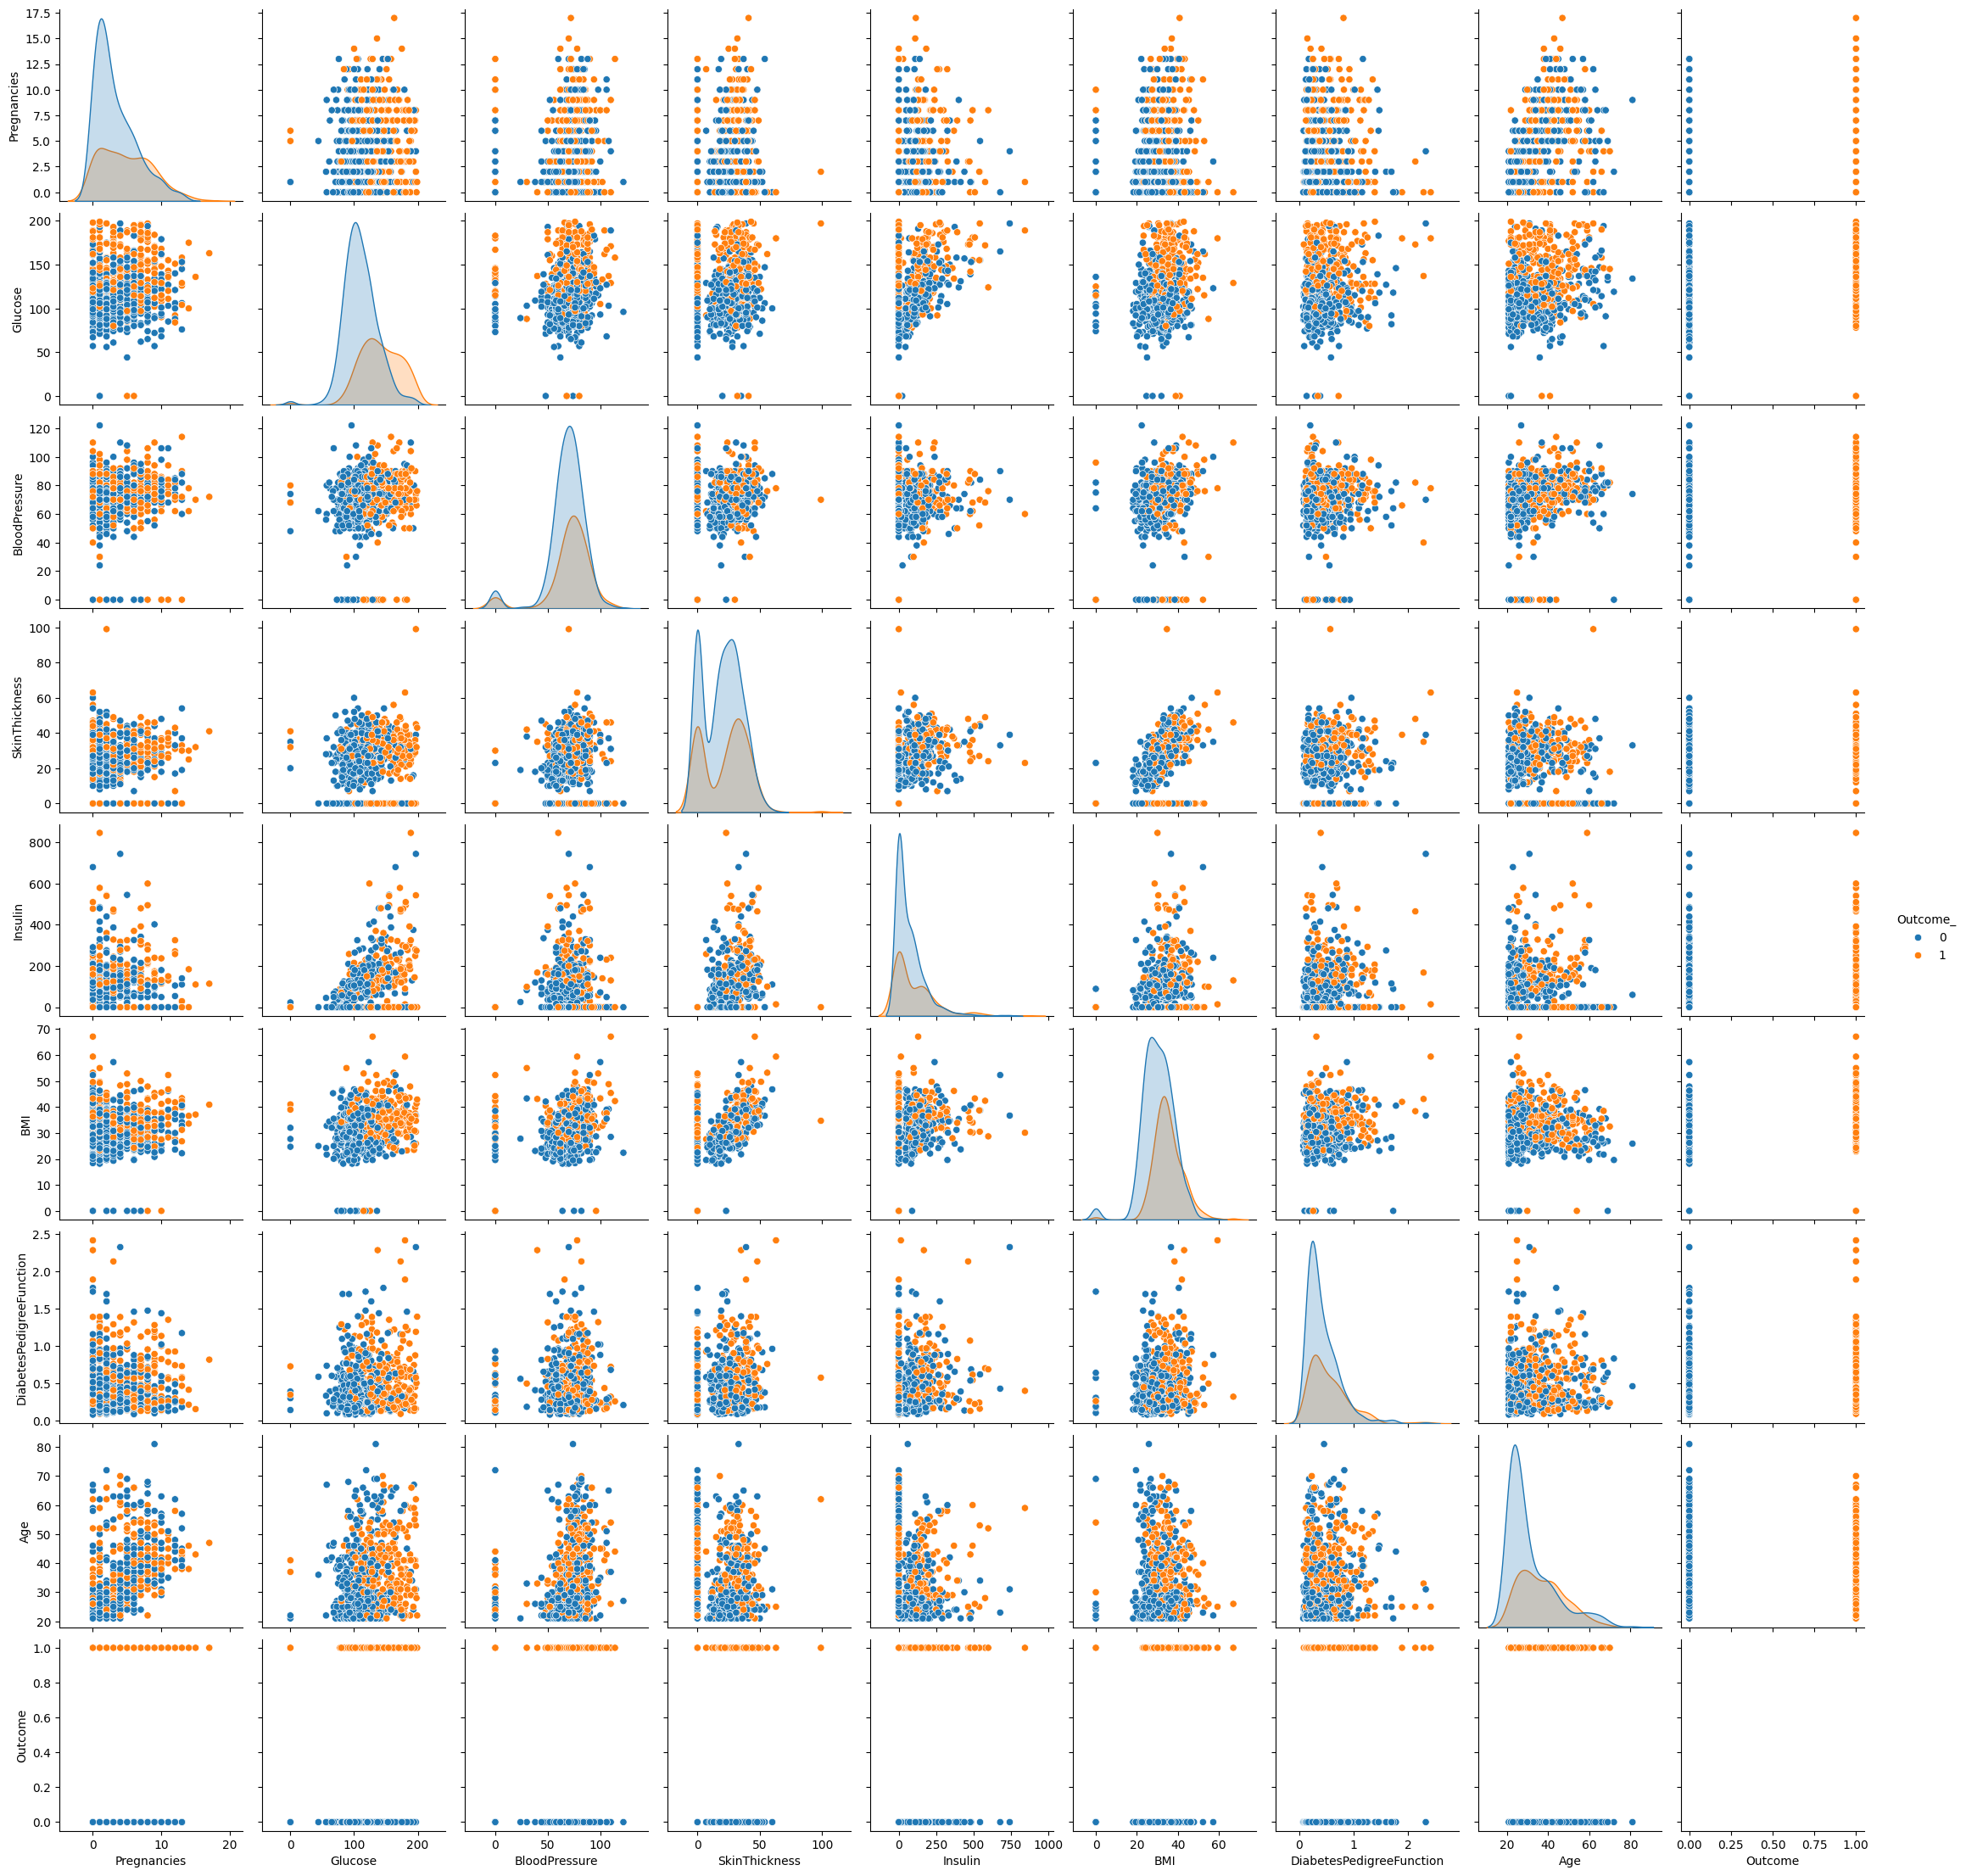

In [243]:
sns.pairplot(df, hue= "Outcome_")

In [244]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Outcome_'],
      dtype='object')

In [245]:
X = df.drop(["Outcome", "Outcome_"], axis=1)
y = df["Outcome"]

In [246]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=667, stratify=y)

model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [247]:
accuracy_score(y_test, y_pred)

0.7705627705627706

In [248]:
0.7662337662337663

0.7662337662337663

In [249]:
y_pred_proba = model.predict_proba(X_test)

In [250]:
from sklearn.metrics import confusion_matrix
# see how model confusion matrix varies with threshold
bestmodel = model

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No Diabetics','Diabetics']

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [6,6])
    sns.heatmap(conf, cmap='Blues', annot=True, square=True, cbar=False,
           xticklabels=labels,
           yticklabels=labels);
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show() # This is part that needs to be added to fix the issue

# Let's see how our confusion matrix changes with changes to the cutoff!
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [251]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.72      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [252]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5).mean()

0.7695696460402341

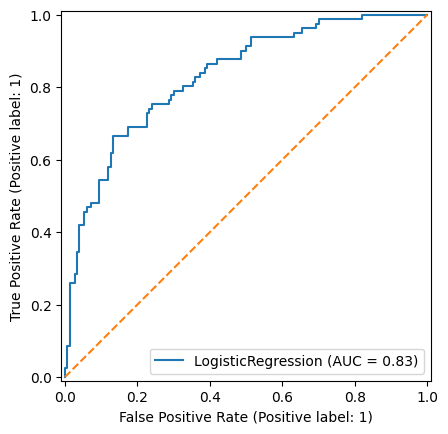

In [253]:
ax = plt.gca()
RocCurveDisplay.from_estimator(
    model, X_test, y_test, ax=ax
)
plt.plot([0,1],[0,1],"--")

In [254]:
model_elastic = LogisticRegression(penalty="l2")
model_elastic.fit(X_train, y_train)
y_pred = model_elastic.predict(X_test )
accuracy_score(y_test, y_pred)

0.7705627705627706

In [255]:
model.score(X_test, y_test)

0.7705627705627706